# cosetes meves


In [1]:
#importem tota la col.lecció de piulades

import pandas as pd

df = pd.read_csv('tweets_public.csv', index_col='tweet_id')

#print("df en brut: ",df.shape) #dimensió de la matriu pandas
print("importada matriu de piulades en brut: ",df.shape) #dimensió de la matriu pandas


importada matriu de piulades en brut:  (8784, 14)


In [2]:
#netejar dades
df = df.loc[df.airline_sentiment_confidence > .99] #buidem aquells que tenen confidence < 0.95 
#print("df amb confidència: ",df.shape) #dimensió matriu. 
print("matriu de piulades netejades: ",df.shape) #dimensió matriu. 

matriu de piulades netejades:  (6240, 14)


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


def obtain_data_representation(df, test=None):
    # If there is no test data, split the input
    if test is None:
        # Divide data in train and test
        train, test = train_test_split(df, test_size=0.25) #dividim el df en 2, 75% i 25%. 
        #print("train shape: ",train.shape) #==> dataframe de test
        #print(train.head())
        df_train = train.loc
        #print("test shape: ",test.shape)
        #df.airline_sentiment = pd.Categorical(df.airline_sentiment) # mikel: que està fent aqui? 
        #print(df.shape)
    else:
        # Otherwise, all is train
        train = df
        
    # Create a Bag of Words (BoW), by using train data only
    #cv = CountVectorizer(max_features=2000,stop_words='english', token_pattern=r'[A-Za-z@#]{3,}|no|yes|wtf|hrs|jfk', min_df = 5)
    cv = CountVectorizer(max_features=200,stop_words='english', token_pattern=r'[A-Za-z@#]{3,}|no|yes|wtf|hrs|jfk', min_df = 5)

    vectonizer = cv.fit(train['text'])
    #print("BoW: ",cv.vocabulary_) 
    #print("bloquejats : ",cv.stop_words_) 
        
    x_train = vectonizer.transform(train['text']) #==> matriu piuladesXparaules, i les dades son el nombre de cops que apareix una paraula
    y_train = train['airline_sentiment'].values #==> matriu amb resultat per cada piulada: piulada-resultat. (Px1)
    
    #print("x_train shape: ",x_train.shape)
    #print("y_train shape: ",y_train.shape)
        
    #print("y_train: ",y_train)
    #print("x_train[0]: ")
    #print("x_train[0]: ")
    #print(x_train[0])
    #print("el primer de test['train']")
    #print(train['text'].head(1))
           
    # Obtain BoW for the test data, using the previously fitted one
    x_test = cv.transform(test['text'])
    #print("x_test shape: ",x_test.shape)
    #print("x_test[0]: ")
    #print(x_test.head())
    
    y_test = test['airline_sentiment'].values
    #print("el primer de test['text']")
    #print(test['text'].head(1))
    #print(y_test)

        
    return {
        'train': {
            'x': x_train,
            'y': y_train
        },
        'test': {
            'x': x_test,
            'y': y_test
        }
    }

In [121]:
#provar els models.
from sklearn.metrics import accuracy_score

def train_model(dataset, dmodel, nom_model, *model_args, **model_kwargs):
    # Create a Naive Bayes model
    model = dmodel(*model_args, **model_kwargs)
    
    # Train it
    model.fit(dataset['train']['x'], dataset['train']['y'])
    
    # Predict new values for test
    y_pred = model.predict(dataset['test']['x'])
    
    # Print accuracy score unless its the submission dataset
    if dataset['test']['y'] is not None:
        score = accuracy_score(dataset['test']['y'], y_pred)
        print("Model", nom_model, "score is: {}".format(score))

    # Done
    return model, y_pred

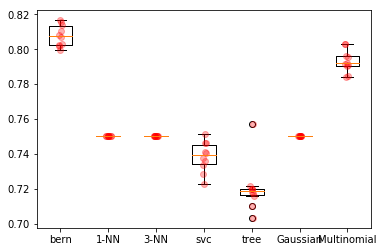

In [24]:
#intento provar els models de un altre forma, que jo pugui entrendre. :P 

%matplotlib inline 
#això es elque faltava per a pintar la gràfica!!!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import metrics
from sklearn import model_selection
from sklearn import tree
from sklearn import svm


df = pd.read_csv('tweets_public.csv', index_col='tweet_id')
df = df.loc[df.airline_sentiment_confidence > .99]
#dataset = obtain_data_representation(df)

acc_r=np.zeros((10,7))

for i in range(10):
    dataset = obtain_data_representation(df)
    
    bern = BernoulliNB()
    bern.fit(dataset['train']['x'], dataset['train']['y'])
    yhat_bern=bern.predict(dataset['test']['x'])
    acc_r[i][0] = metrics.accuracy_score(yhat_bern, dataset['test']['y'])
    
    if 0 is 1:
        nn1 = neighbors.KNeighborsClassifier(n_neighbors=1)
        nn1.fit(dataset['train']['x'], dataset['train']['y'])
        yhat_nn1=nn1.predict(dataset['test']['x'])
        acc_r[i][1] = metrics.accuracy_score(yhat_nn1, dataset['test']['y'])
    else:
        acc_r[i][1] = 0.75 #per no escaxarrar la grfica. 
    
    if 0 is 1:
        nn3 = neighbors.KNeighborsClassifier(n_neighbors=3)
        nn3.fit(dataset['train']['x'], dataset['train']['y'])
        yhat_nn3=nn3.predict(dataset['test']['x'])
        acc_r[i][2] = metrics.accuracy_score(yhat_nn3, dataset['test']['y'])
    else:
        acc_r[i][2] = 0.75 #per no escaxarrar la grfica. 
    
    svc = svm.SVC()
    svc.fit(dataset['train']['x'], dataset['train']['y'])
    yhat_svc=svc.predict(dataset['test']['x'])
    acc_r[i][3] = metrics.accuracy_score(yhat_svc, dataset['test']['y'])
    
    dt = tree.DecisionTreeClassifier()
    dt.fit(dataset['train']['x'], dataset['train']['y'])
    yhat_dt=dt.predict(dataset['test']['x'])
    acc_r[i][4] = metrics.accuracy_score(yhat_dt, dataset['test']['y'])

    if 0 is 1:
        Gaussian = GaussianNB()
        Gaussian.fit(dataset['train']['x'], dataset['train']['y'])
        yhat_Gaussian=Gaussian.predict(dataset['test']['x'])
        acc_r[i][5] = metrics.accuracy_score(yhat_Gaussian, dataset['test']['y'])
    else:
        acc_r[i][5] = 0.75 #joder, per no escaxarrar la gràfica
        
    Multinomial = MultinomialNB()
    Multinomial.fit(dataset['train']['x'], dataset['train']['y'])
    yhat_Multinomial=Multinomial.predict(dataset['test']['x'])
    acc_r[i][6] = metrics.accuracy_score(yhat_Multinomial, dataset['test']['y'])
    
    
    
plt.boxplot(acc_r);
for i in range(7):
    xderiv = (i+1)*np.ones(acc_r[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc_r[:,i],'ro',alpha=0.3)
    
ax = plt.gca()
ax.set_xticklabels(['bern','1-NN','3-NN','svc','tree','Gaussian','Multinomial'])


In [122]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier



df = pd.read_csv('tweets_public.csv', index_col='tweet_id')
df = df.loc[df.airline_sentiment_confidence > .99]
dataset = obtain_data_representation(df)

# Train a Bernoulli Naive Bayes
modelNB, _ = train_model(dataset, BernoulliNB, "BernoulliNB")

# Train a K Nearest Neighbors Classifier
modelKN, _ = train_model(dataset, KNeighborsClassifier, "KNeighborsClassifier")

x_test shape:  (1560, 10)
Model BernoulliNB score is: 0.7121794871794872
Model KNeighborsClassifier score is: 0.7051282051282052


## a partir d'aqui son merdes meves. 

In [141]:
#df.head(1)
print(dataset['train']['x'].shape)
print(dataset['train']['y'].shape)
print("------------------------------")
#print(dataset['train']['x'][2][0,8])
print(dataset['train']['x'][2][0,])
print("------------------------------")
print(dataset['train']['x'][0])
print("------------------------------")

#print(dataset['train']['x'][2].groupby('x'))
print("mikel")
mikel=dataset['train']['x'][2,0]

print(mikel)

mikel=sum(dataset['train']['y']) 
print(mikel)


#print(dataset['train']['x'][].colsum())
#print(dataset['train']['x'])

(4680, 10)
(4680,)
------------------------------
  (0, 4)	1
------------------------------
  (0, 2)	1
  (0, 6)	1
  (0, 9)	1
------------------------------
mikel
0


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [33]:
dataset = obtain_data_representation(df) #obtenim el nostre dataset. 
print("mikel:    ")
#print(dataset['train']['x'])
print(dataset['train']['x'][0])
print(dataset['train']['y'][0])
print(dataset)

train shape:  (4680, 14)
BoW:  {'@southwestair': 2, 'flight': 6, 'and': 5, 'you': 9, '@united': 3, 'the': 8, 'for': 7, '@usairways': 4, '@americanair': 0, '@jetblue': 1}
x_train shape:  (4680, 10)
y_train shape:  (4680,)
x_train[0]: 
  (0, 2)	1
  (0, 5)	1
  (0, 6)	1
el primer de test['train']
tweet_id
568998681715695618    @southwestair Landed an hour Late Flight from ...
Name: text, dtype: object
mikel:    
  (0, 2)	1
  (0, 5)	1
  (0, 6)	1
negative
{'train': {'x': <4680x10 sparse matrix of type '<class 'numpy.int64'>'
	with 10922 stored elements in Compressed Sparse Row format>, 'y': array(['negative', 'positive', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)}, 'test': {'x': <1560x10 sparse matrix of type '<class 'numpy.int64'>'
	with 3693 stored elements in Compressed Sparse Row format>, 'y': array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)}}


In [6]:
df.head(1)
#df[0:1]
#df.loc[0:1,['text']]


,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
569237160886276096,negative,1.0,Can't Tell,0.6543,Delta,NaN,venkatesh_cr,NaN,0,@JetBlue I've been in pricing for 8 years to k...,NaN,2015-02-21 12:48:09 -0800,Austin Texas,Central Time (US & Canada)
